# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

## 1. Create a 4 dimensional data set with 64 elements and show all 4 scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$,  $x_3$ vs. $y$, $x_4$ vs. $y$

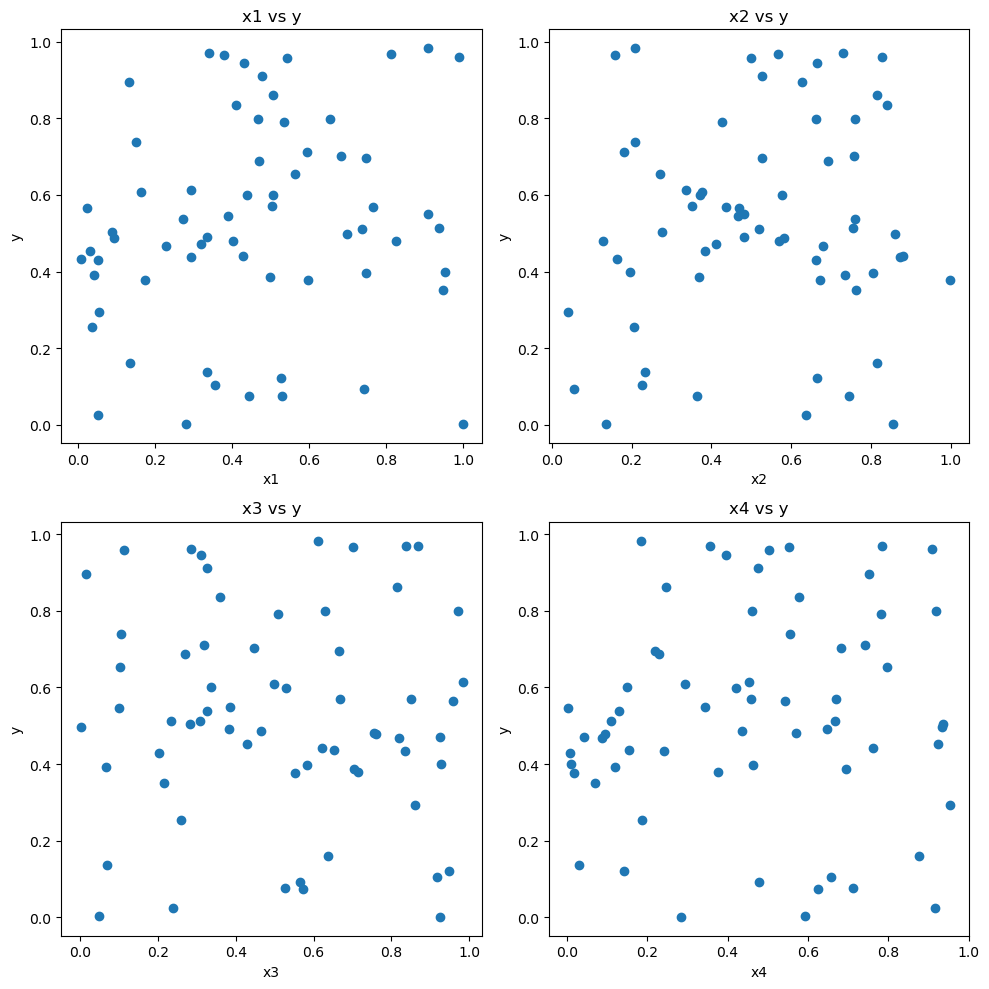

In [66]:
#Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Define 4 dimensions of data for X and 1 for Y each containing 64 elements
x1 = np.random.rand(64)
x2 = np.random.rand(64)
x3 = np.random.rand(64)
x4 = np.random.rand(64)
y = np.random.rand(64)

#Modify scatter plot dimensions (figure size) for better visibility
plt.figure(figsize=(10,10))

#Scatter plot for the first X dimension (x1)
plt.subplot(2, 2, 1)
plt.scatter(x1, y)
plt.title('x1 vs y')
plt.xlabel('x1')
plt.ylabel('y')

#Scatter plot for the second X dimension (x2)
plt.subplot(2, 2, 2)
plt.scatter(x2, y)
plt.title('x2 vs y')
plt.xlabel('x2')
plt.ylabel('y')

#Scatter plot for the third X dimension (x3)
plt.subplot(2, 2, 3)
plt.scatter(x3, y)
plt.title('x3 vs y')
plt.xlabel('x3')
plt.ylabel('y')

#Scatter plot for the fourth X dimension (x4)
plt.subplot(2, 2, 4)
plt.scatter(x4, y)
plt.title('x4 vs y')
plt.xlabel('x4')
plt.ylabel('y')

#Add/modify space between scatter plots to make the information easier to digest
plt.tight_layout()


## 2.  Create a Linear Regression model (LIKE WE DID IN CLASS) to fit the data. *Use the example from Lesson 3 and DO NOT USE a library that calculates automatically*. We are expecting 5 coefficients to describe the linear model. 

## After creating the model (finding the coefficients), calculate a new column $y_p=\Sigma\beta_n\cdot x_n$ 

In [67]:
#Load Relevant Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Combine the 4 defined arrays into a single matrix (1 x 4). Each array is now 
x = np.column_stack((x1, x2, x3, x4))

#Retrieve the number of observations in the data. Creates a column vector of ones + stacks horizonitally & combines with the original x matrix above (resulting in a new matrix x_l that contains the intercept)
n = x.shape[0]
x_l = np.hstack((np.ones((n, 1)), x))

#Define the linear regression model - computes the following information: dot product of transpose x_l with x_l, inverse dot product. Coefficients are obtained by multiplying these two pieces of information
left = np.linalg.inv(np.dot(x_l.T, x_l))
right = np.dot(x_l.T, y)
b_l = np.dot(left, right)

#Print coefficients
print(b_l)

#Solve for prediction values across all dimensions 
p_y = np.dot(x_l, b_l)

[ 0.40058067  0.15032917  0.07688896 -0.03305577  0.07642402]


## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

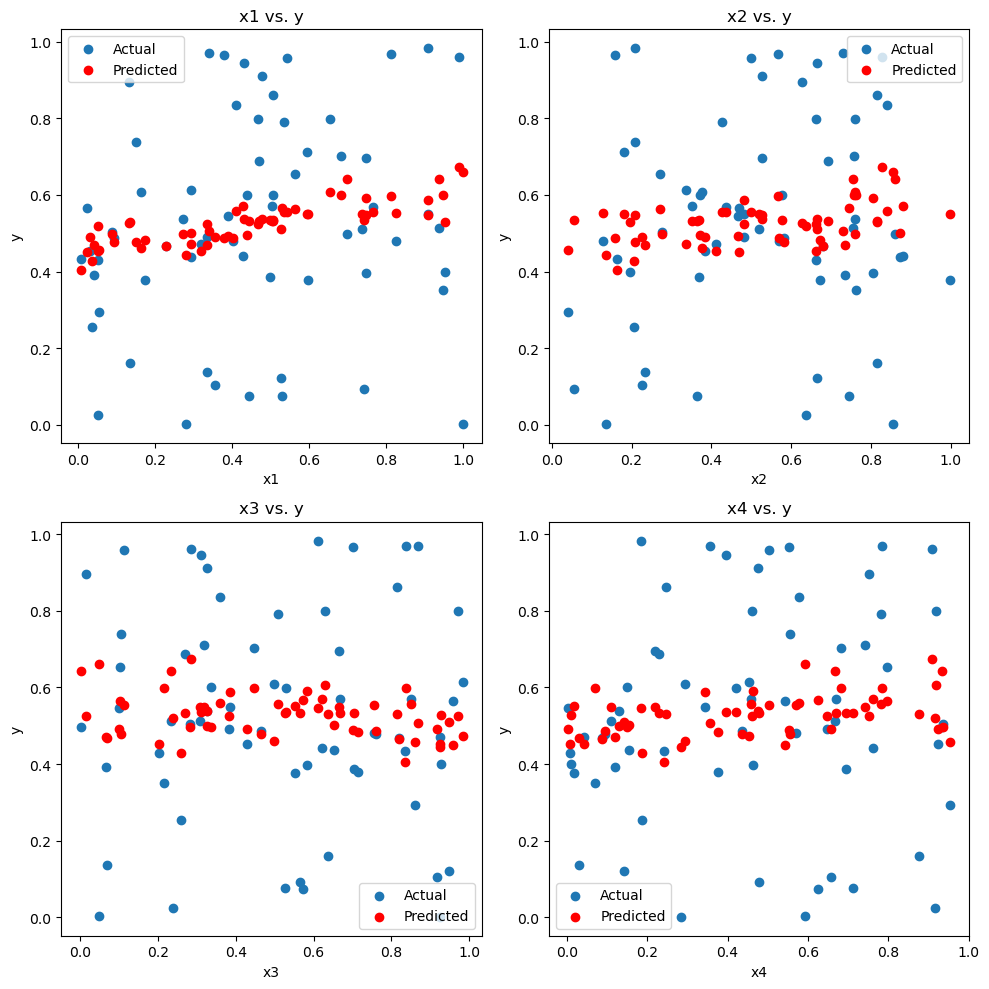

In [68]:
#Load Relevant Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Modify scatter plot dimensions (figure size) for better visibility
plt.figure(figsize=(10,10))

#Scatter plot for first X Dimension with predicted values (x1)
plt.subplot(2, 2, 1)
plt.scatter(x1, y, label='Actual')
plt.scatter(x1, p_y, color='red', label='Predicted')
plt.title('x1 vs. y')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()

#Scatter plot for the second X dimension with predicted values (x2)
plt.subplot(2, 2, 2)
plt.scatter(x2, y, label='Actual')
plt.scatter(x2, p_y, color='red', label='Predicted')
plt.title('x2 vs. y')
plt.xlabel('x2')
plt.ylabel('y')
plt.legend()

#Scatter plot for the third X dimension with predicted values (x3)
plt.subplot(2, 2, 3)
plt.scatter(x3, y, label='Actual')
plt.scatter(x3, p_y, color='red', label='Predicted')
plt.title('x3 vs. y')
plt.xlabel('x3')
plt.ylabel('y')
plt.legend()

#Scatter plot for the fourth X dimension with predicted values (x4)
plt.subplot(2, 2, 4)
plt.scatter(x4, y, label='Actual')
plt.scatter(x4, p_y, color='red', label='Predicted')
plt.title('x4 vs. y')
plt.xlabel('x4')
plt.ylabel('y')
plt.legend()

#Add/modify space between scatter plots to make the information easier to digest
plt.tight_layout()


## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating (Column `Rating`)

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
c_df = 'Credit.csv'
credit = pd.read_csv(c_df)
credit.head()


,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [70]:
columns = ['Income', 'Education', 'Age', 'Cards', 'Balance', 'Limit']
X = credit[columns].values

X = np.vstack([X.T, np.ones(len(X))]).T
X


array([[1.48910e+01, 1.10000e+01, 3.40000e+01, ..., 3.33000e+02,
        3.60600e+03, 1.00000e+00],
       [1.06025e+02, 1.50000e+01, 8.20000e+01, ..., 9.03000e+02,
        6.64500e+03, 1.00000e+00],
       [1.04593e+02, 1.10000e+01, 7.10000e+01, ..., 5.80000e+02,
        7.07500e+03, 1.00000e+00],
       ...,
       [5.78720e+01, 1.20000e+01, 6.70000e+01, ..., 1.38000e+02,
        4.17100e+03, 1.00000e+00],
       [3.77280e+01, 1.30000e+01, 4.40000e+01, ..., 0.00000e+00,
        2.52500e+03, 1.00000e+00],
       [1.87010e+01, 7.00000e+00, 6.40000e+01, ..., 9.66000e+02,
        5.52400e+03, 1.00000e+00]])

In [71]:
y = credit['Rating']
y


0      283
1      483
2      514
3      681
4      357
      ... 
395    307
396    296
397    321
398    192
399    415
Name: Rating, Length: 400, dtype: int64

### 5. Plot your results using scatter plots (just like in class). Show as many of your columns vs. credit rating that you can.

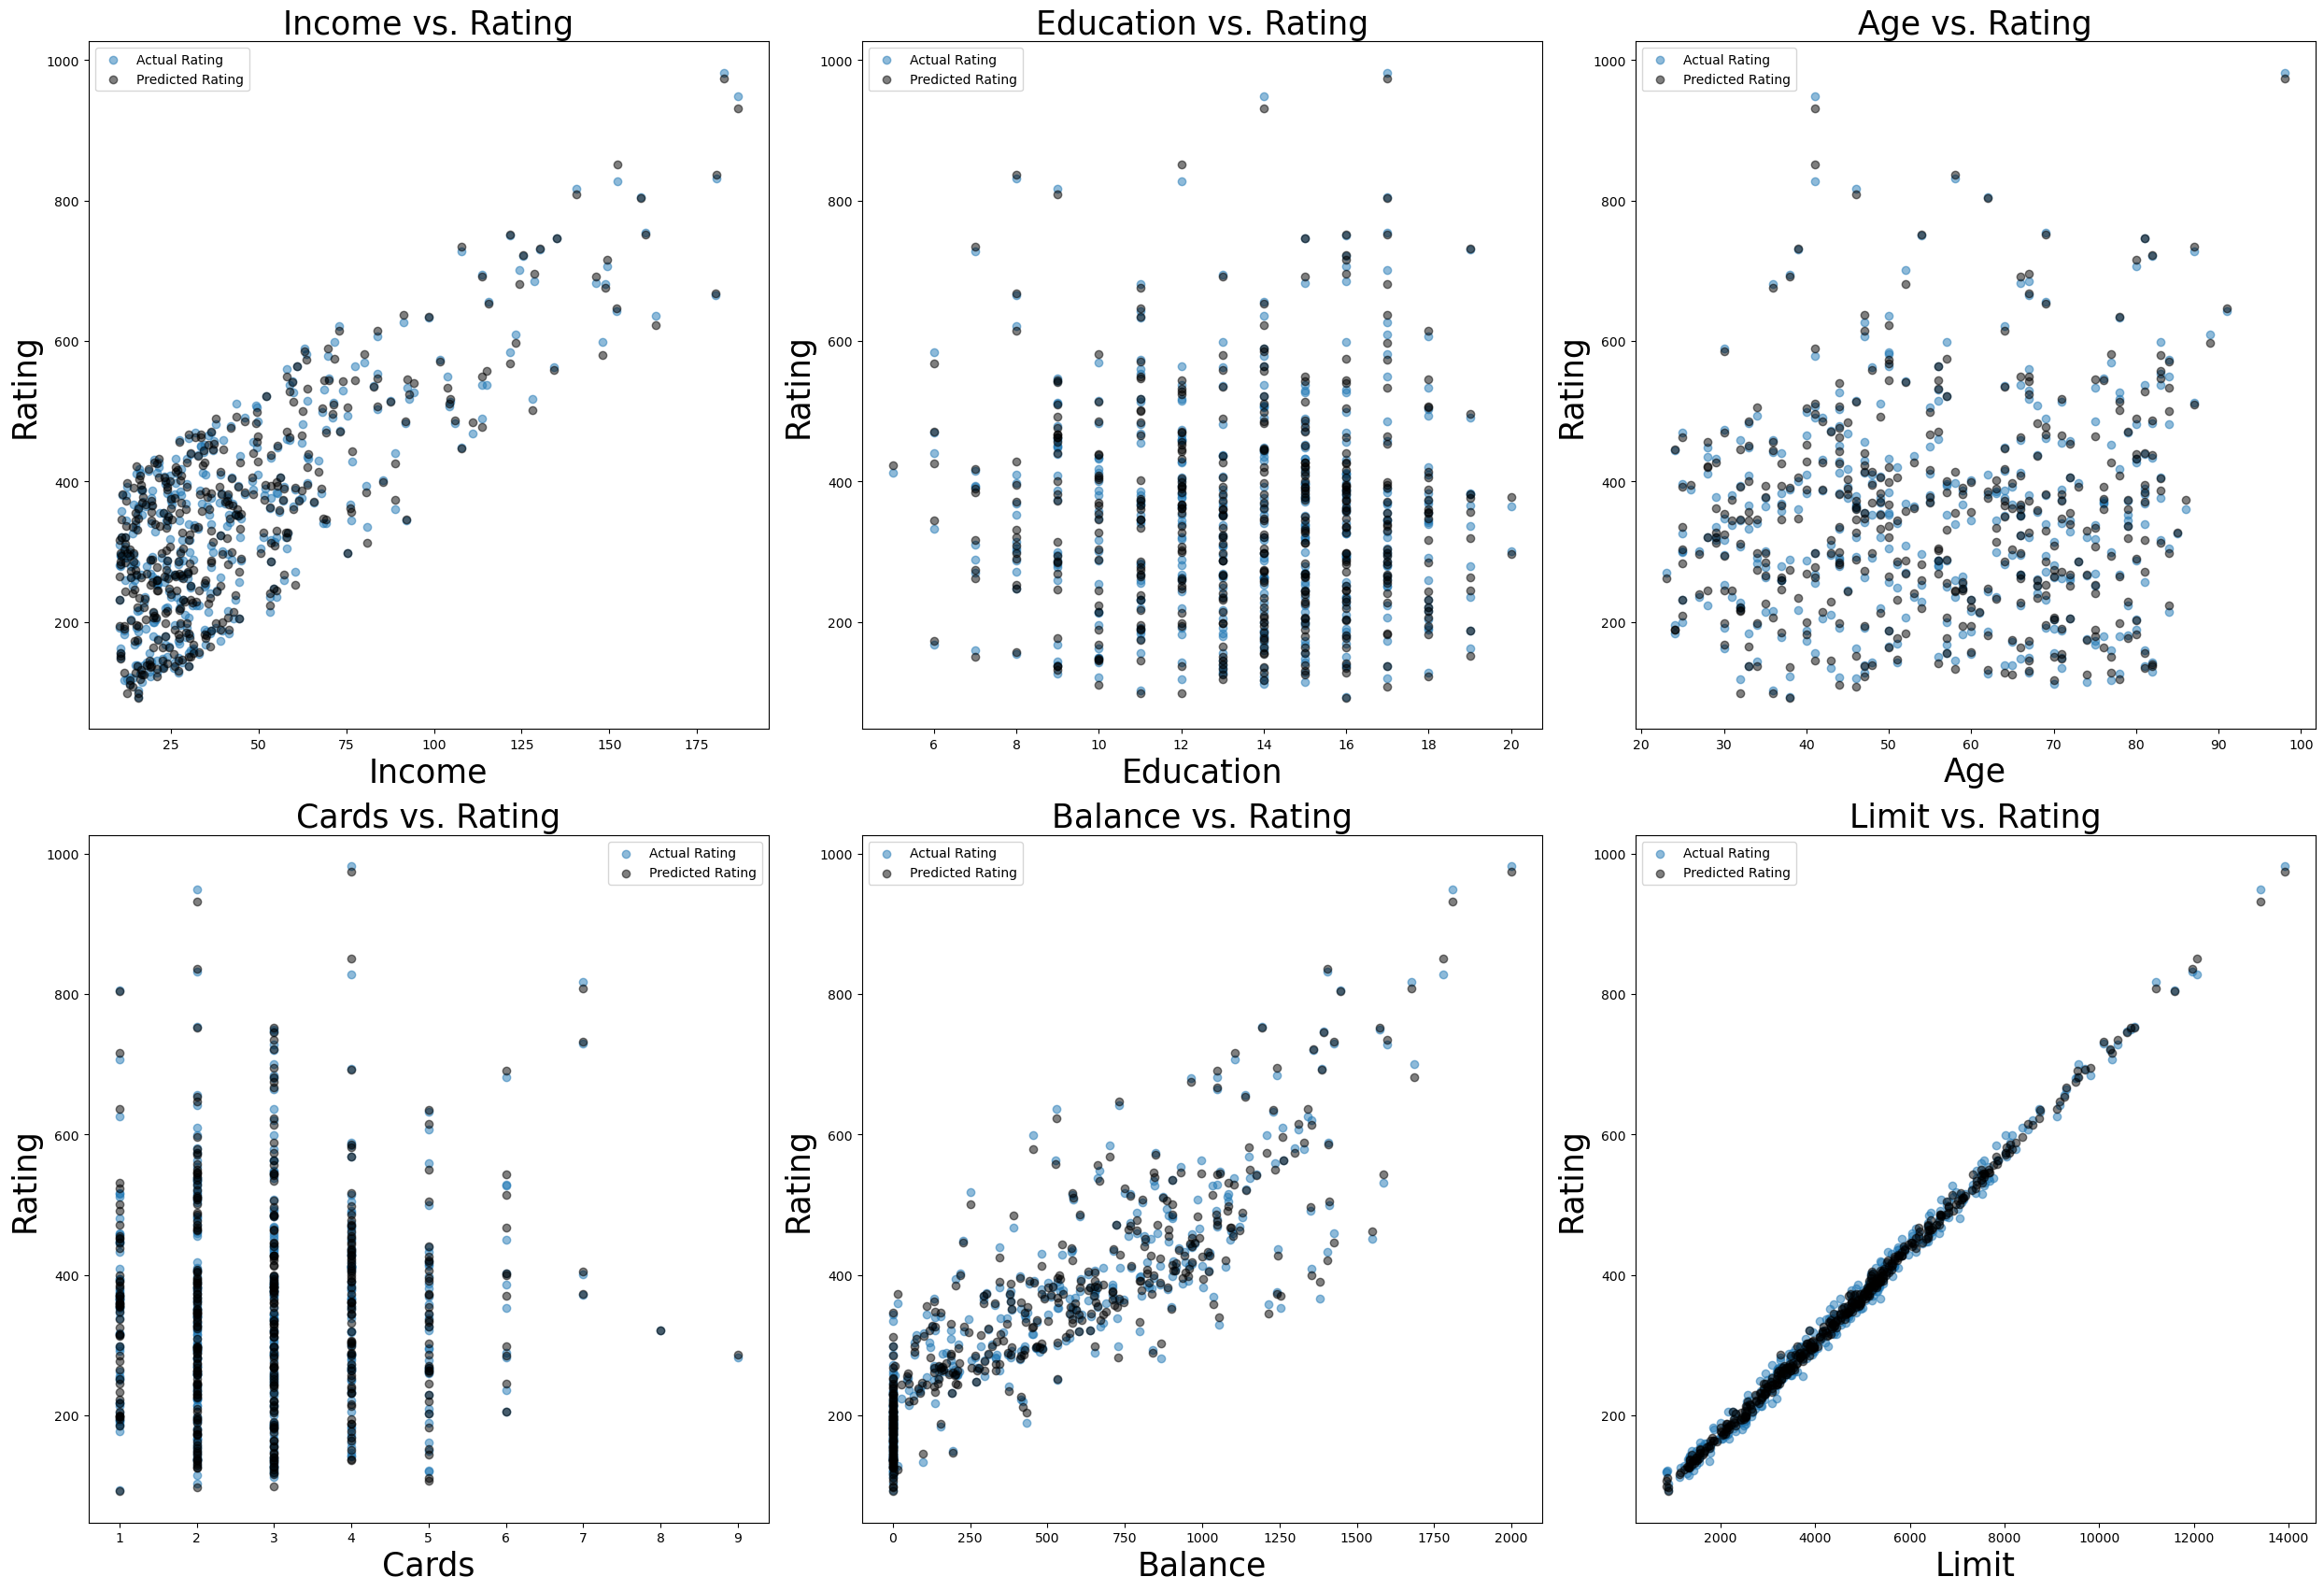

In [72]:
#Load relevant packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
   
#Obtain Income and Education from credit and define it as x1. Obtain rating values from credit and define it as y1. Obtain the number of observations.
x1 = credit[['Income', 'Education', 'Age', 'Cards', 'Balance', 'Limit']].values
y1 = credit['Rating'].values
n1 = x1.shape[0]

#Define the linear regression model - computes the coefficients (store as b1_l). 
x1_l = np.hstack((np.ones((n1, 1)), x1))
left1 = np.linalg.inv(np.dot(x1_l.T, x1_l))
right1 = np.dot(x1_l.T, y1)
b1_l = np.dot(left1, right1)

#Calculate predicted values by multiplying the x1_l matrix by the coefficients (stored as p_1)
p_1 = np.dot(x1_l, b1_l)

#Modify scatter plots (figure size) to the following dimensions
plt.figure(figsize=(25, 25)) 

#Income vs. rating scatter plot
plt.subplot(3, 3, 1) 
plt.scatter(credit['Income'], y1, alpha=0.5, label='Actual Rating')
plt.scatter(credit['Income'], p_1, color='black', alpha=0.5, label='Predicted Rating')
plt.xlabel('Income', fontsize = 25)
plt.ylabel('Rating', fontsize = 25)
plt.title('Income vs. Rating', fontsize = 25)
plt.legend()

#Education vs. rating scatter plot
plt.subplot(3, 3, 2)
plt.scatter(credit['Education'], y1,alpha=0.5, label='Actual Rating')
plt.scatter(credit['Education'], p_1, color='black', alpha=0.5, label='Predicted Rating')
plt.xlabel('Education', fontsize = 25)
plt.ylabel('Rating', fontsize = 25)
plt.title('Education vs. Rating', fontsize = 25)
plt.legend()

#Age vs. rating scatter plot
plt.subplot(3, 3, 3)
plt.scatter(credit['Age'], y1, alpha=0.5, label='Actual Rating')
plt.scatter(credit['Age'], p_1, color='black', alpha=0.5, label='Predicted Rating')
plt.xlabel('Age', fontsize = 25)
plt.ylabel('Rating', fontsize = 25)
plt.title('Age vs. Rating', fontsize = 25)
plt.legend()

#Number of cards vs. rating scatter plot
plt.subplot(3, 3, 4)
plt.scatter(credit['Cards'], y1, alpha=0.5, label='Actual Rating')
plt.scatter(credit['Cards'], p_1, color='black', alpha=0.5, label='Predicted Rating')
plt.xlabel('Cards', fontsize = 25)
plt.ylabel('Rating', fontsize = 25)
plt.title('Cards vs. Rating', fontsize = 25)
plt.legend()

#Balance vs. rating scatter plot
plt.subplot(3, 3, 5)
plt.scatter(credit['Balance'], y1, alpha=0.5, label='Actual Rating')
plt.scatter(credit['Balance'], p_1, color='black', alpha=0.5, label='Predicted Rating')
plt.xlabel('Balance', fontsize = 25)
plt.ylabel('Rating', fontsize = 25)
plt.title('Balance vs. Rating', fontsize = 25)
plt.legend()

#Limit vs. rating scatter plot
plt.subplot(3, 3, 6)
plt.scatter(credit['Limit'], y1, alpha=0.5, label='Actual Rating')
plt.scatter(credit['Limit'], p_1, color='black', alpha=0.5, label='Predicted Rating')
plt.xlabel('Limit', fontsize = 25)
plt.ylabel('Rating', fontsize = 25)
plt.title('Limit vs. Rating', fontsize = 25)
plt.legend()

#Add/modify space between scatter plots to make the information easier to digest
plt.tight_layout()